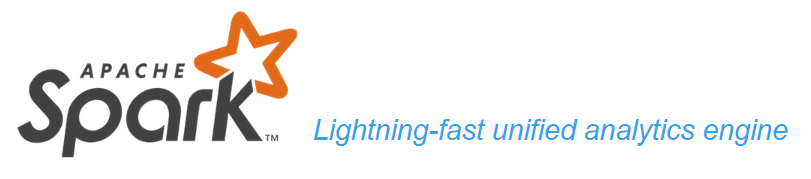

# Pre-processing and Feature Engineering
<a href="http://spark.apache.org/docs/latest/ml-features.html" traget=_blank>PySpark Feature Engineering </a>

To preprocess your data for Spark's different ML model, you must consider your end objective. The following list here walkthrouh the requirement for input data structure for each advance analytics task in MLlib

- In the case of most classification and regression algorithms, you want to get your data into a column of type Double to represent the label and a column of type Vector (either dense or sparse) to represent the features.

- In the case of recommendation, you want to get your data into a column of users, a column of items (say movies or books), and a column of ratings.

- In the case of unsupervised learning, a column of type Vector (either dense or sparse) is needed to represent the features.

The best way to get your data in these formats is through transformers. Transformers are functions that accept a DataFrame as an argument and return a new DataFrame as a response.

We’re going to read in several different sample datasets, each of which has different properties 
Under this we do Extraction, transformation and selecting features. This is broadly divided into following categories:


1. <a href="http://spark.apache.org/docs/latest/ml-features.html#feature-transformers" target=_blank>Features Transformer</a>: Scaling, converting, or modifying features
2. <a href="http://spark.apache.org/docs/latest/ml-features.html#feature-selectors" target=_blank>Feature Selection</a>: Selecting a subset from a larger set of features
3. <a href="http://spark.apache.org/docs/latest/ml-features.html#feature-extractors" targe=_blank>Extraction</a> Extracting features from “raw” data


# 1. <a href="http://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.Transformer" target=_bank>Transformer</a>
Transformers are functions that convert raw data in some way. This might be to create a new interaction variable (from two other variables), to normalize a column, or to simply turn it into a Double to be input into a model. Transformers are primarily used in preprocessing or feature generation. It has only transform() method.

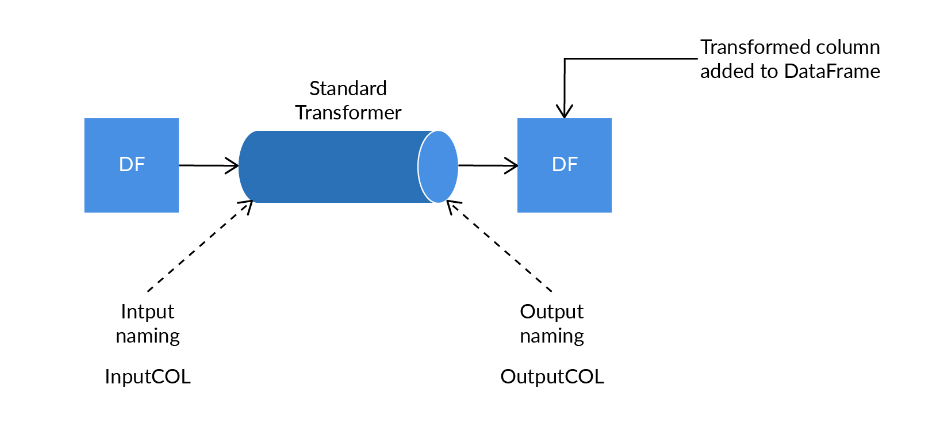

All transformers require you to specify, at a minimum, the inputCol and the outputCol, which represent the column name of the input and output, respectively.

Following are few transformers funtions available for your review. You can refer url (http://spark.apache.org/docs/latest/ml-features.html) for detailed informatilon about each fuction.  In this scope we are going to talk about few fuction

- Tokenizer
- StopWordsRemover
- n-gram
- Binarizer
- PCA
- PolynomialExpansion
- Discrete Cosine Transform (DCT)
- StringIndexer
- IndexToString
- OneHotEncoder (Deprecated since 2.3.0)
- OneHotEncoderEstimator
- VectorIndexer
- Interaction
- Normalizer
- StandardScaler
- MinMaxScaler
- MaxAbsScaler
- Bucketizer
- ElementwiseProduct
- SQLTransformer
- VectorAssembler
- VectorSizeHint
- QuantileDiscretizer
- Imputer

Out of above fuctions mentioned, in this lector we will walkthrouh with few function like Vector Assembler, RFormule, SqlTransofer, VectorAssembler, Bucketting and OneHotEncoding

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Feature Engineering").getOrCreate()

In [2]:
#Create dataframe by calling read() method on SparkSession/spark object
sales = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load("/common_folder/pyspark_data/retail-data/day-by-day/*.csv")\
  .coalesce(5)\
  .where("Description IS NOT NULL")
fakeIntDF = spark.read.parquet("/common_folder/pyspark_data/simple-ml-integers")
simpleDF = spark.read.json("/common_folder/pyspark_data/simple-ml")
scaleDF = spark.read.parquet("/common_folder/pyspark_data/simple-ml-scaling")

#In addition to this realistic sales data, we’re going to use several simple synthetic datasets as well. FakeIntDF, 
#simpleDF, and scaleDF all have very few rows. This will give you the ability to focus on the exact data manipulation
#The coalesce method reduces the number of partitions in a DataFrame. Here’s how to consolidate the data in 5 partitions:

In [3]:
# Because we’re going to be accessing the sales data a number of times, we’re going to cache it so
# we can read it efficiently from memory as opposed to reading it from disk every time we need it.
sales.cache()
sales.show(2)
fakeIntDF.show(2)
scaleDF.show(2)
simpleDF.show(2)

+---------+---------+-------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|        Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+-------------------+--------+-------------------+---------+----------+--------------+
|   580538|    23084| RABBIT NIGHT LIGHT|      48|2011-12-05 08:38:00|     1.79|   14075.0|United Kingdom|
|   580538|    23077|DOUGHNUT LIP GLOSS |      20|2011-12-05 08:38:00|     1.25|   14075.0|United Kingdom|
+---------+---------+-------------------+--------+-------------------+---------+----------+--------------+
only showing top 2 rows

+----+----+----+
|int1|int2|int3|
+----+----+----+
|   1|   2|   3|
|   4|   5|   6|
+----+----+----+
only showing top 2 rows

+---+--------------+
| id|      features|
+---+--------------+
|  0|[1.0,0.1,-1.0]|
|  1| [2.0,1.1,1.0]|
+---+--------------+
only showing top 2 rows

+-----+----+------+------------------+
|color| lab|valu

# VectorAssembler
The VectorAssembler is a tool you’ll use in nearly every single pipeline you generate. It helps concatenate all your features into one big vector you can then pass into an estimator. It’s used typically in the last step of a machine learning pipeline and takes as input a number of columns of Boolean, Double, or Vector. This is particularly helpful if you’re going to perform a number of manipulations using a variety of transformers and need to gather all of those results together.

In [4]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler().setInputCols(["int1", "int2", "int3"])
va.transform(fakeIntDF).show()

+----+----+----+------------------------------------+
|int1|int2|int3|VectorAssembler_f2bbc1a413ad__output|
+----+----+----+------------------------------------+
|   1|   2|   3|                       [1.0,2.0,3.0]|
|   4|   5|   6|                       [4.0,5.0,6.0]|
|   7|   8|   9|                       [7.0,8.0,9.0]|
+----+----+----+------------------------------------+



# RFormula:
The RFormula is the easiest transfomer to use when you have “conventionally” formatted data. Spark borrows this transformer from the R language to make it simple to declaratively specify a set of transformations for your data. RFormula produces a vector column of features and a double or string column of label

In this case, we want to use all available variables (the .) and then specify an interaction between value1 and color and value2 and color as additional features to generate:

Interaction
In some cases, you might have domain knowledge about specific variables in your dataset. For example, you might know that a certain interaction between the two variables is an important variable to include in a downstream estimator. The feature transformer Interaction allows you to create an interaction between two variables manually. It just multiplies the two features together—something that a typical linear model would not do for every possible pair of features in your data. This transformer is currently only available directly in Scala but can be called from any language using the RFormula. We recommend users just use RFormula instead of manually creating interactions.

In [5]:
from pyspark.ml.feature import RFormula

In [6]:
supervised = RFormula(formula="lab ~ . + color:value1 + color:value2")

supervised.fit(simpleDF).transform(simpleDF).show()

+-----+----+------+------------------+--------------------+-----+
|color| lab|value1|            value2|            features|label|
+-----+----+------+------------------+--------------------+-----+
|green|good|     1|14.386294994851129|(10,[1,2,3,5,8],[...|  1.0|
| blue| bad|     8|14.386294994851129|(10,[2,3,6,9],[8....|  0.0|
| blue| bad|    12|14.386294994851129|(10,[2,3,6,9],[12...|  0.0|
|green|good|    15| 38.97187133755819|(10,[1,2,3,5,8],[...|  1.0|
|green|good|    12|14.386294994851129|(10,[1,2,3,5,8],[...|  1.0|
|green| bad|    16|14.386294994851129|(10,[1,2,3,5,8],[...|  0.0|
|  red|good|    35|14.386294994851129|(10,[0,2,3,4,7],[...|  1.0|
|  red| bad|     1| 38.97187133755819|(10,[0,2,3,4,7],[...|  0.0|
|  red| bad|     2|14.386294994851129|(10,[0,2,3,4,7],[...|  0.0|
|  red| bad|    16|14.386294994851129|(10,[0,2,3,4,7],[...|  0.0|
|  red|good|    45| 38.97187133755819|(10,[0,2,3,4,7],[...|  1.0|
|green|good|     1|14.386294994851129|(10,[1,2,3,5,8],[...|  1.0|
| blue| ba

# SQL Transformers
A SQLTransformer allows you to leverage Spark’s vast library of SQL-related manipulations just as you would a MLlib transformation. Any SELECT statement you can use in SQL is a valid transformation. The only thing you need to change is that instead of using the table name, you should just use the keyword TH​IS. You might want to use SQLTransformer if you want to formally codify some DataFrame manipulation as a preprocessing step, or try different SQL expressions for features during hyperparameter tuning. Also note that the output of this transformation will be appended as a column to the output DataFrame.

You might want to use an SQLTransformer in order to represent all of your manipulations on the very rawest form of your data so you can version different variations of manipulations as transformers. This gives you the benefit of building and testing varying pipelines, all by simply swapping out transformers. The following is a basic example of using SQLTransformer:

In [7]:
from pyspark.ml.feature import SQLTransformer

basicTransformation = SQLTransformer()\
  .setStatement("""
    SELECT sum(Quantity), count(*), CustomerID
    FROM __THIS__
    GROUP BY CustomerID
  """)

In [8]:
basicTransformation.transform(sales).show()

+-------------+--------+----------+
|sum(Quantity)|count(1)|CustomerID|
+-------------+--------+----------+
|          440|     143|   16916.0|
|          854|     117|   17884.0|
|          244|      31|   16561.0|
|          491|     152|   13956.0|
|          541|      27|   14285.0|
|          119|      62|   14452.0|
|          204|      76|   13533.0|
|          630|      72|   17633.0|
|         1542|      30|   13094.0|
|          493|      64|   16629.0|
|          150|      16|   14024.0|
|           34|       6|   14768.0|
|           97|      12|   16596.0|
|         1140|      30|   13918.0|
|          159|      38|   17267.0|
|          109|      11|   13973.0|
|          206|      23|   12493.0|
|           88|       7|   14473.0|
|          290|      98|   13607.0|
|          138|      18|   15776.0|
+-------------+--------+----------+
only showing top 20 rows



# Working with Continuous Features
Continuous features are just values on the number line, from positive infinity to negative infinity. There are two common transformers for continuous features. First, you can convert continuous features into categorical features via a process called bucketing, or you can scale and normalize your features according to several different requirements. These transformers will only work on Double types, so make sure you’ve turned any other numerical values to Double:

In [9]:
contDF = spark.range(20).selectExpr("cast(id as double)")

# Bucketing
The most straightforward approach to bucketing or binning is using the Bucketizer. This will split a given continuous feature into the buckets of your designation. You specify how buckets should be created via an array or list of Double values. This is useful because you may want to simplify the features in your dataset or simplify their representations for interpretation later on. For example, imagine you have a column that represents a person’s weight and you would like to predict some value based on this information. In some cases, it might be simpler to create three buckets of “overweight,” “average,” and “underweight.”

To specify the bucket, set its borders. For example, setting splits to 5.0, 10.0, 250.0 on our contDF will actually fail because we don’t cover all possible input ranges. When specifying your bucket points, the values you pass into splits must satisfy three requirements:

- The minimum value in your splits array must be less than the minimum value in your DataFrame.

- The maximum value in your splits array must be greater than the maximum value in your DataFrame.

- You need to specify at a minimum three values in the splits array, which creates two buckets.

In [10]:
from pyspark.ml.feature import Bucketizer
bucketBorders = [-1.0, 5.0, 10.0, 250.0, 600.0]
bucketer = Bucketizer().setSplits(bucketBorders).setInputCol("id")
bucketer.transform(contDF).show()

+----+-------------------------------+
|  id|Bucketizer_2423c74fa355__output|
+----+-------------------------------+
| 0.0|                            0.0|
| 1.0|                            0.0|
| 2.0|                            0.0|
| 3.0|                            0.0|
| 4.0|                            0.0|
| 5.0|                            1.0|
| 6.0|                            1.0|
| 7.0|                            1.0|
| 8.0|                            1.0|
| 9.0|                            1.0|
|10.0|                            2.0|
|11.0|                            2.0|
|12.0|                            2.0|
|13.0|                            2.0|
|14.0|                            2.0|
|15.0|                            2.0|
|16.0|                            2.0|
|17.0|                            2.0|
|18.0|                            2.0|
|19.0|                            2.0|
+----+-------------------------------+



# Working with Categorical Features
The most common task for categorical features is indexing. Indexing converts a categorical variable in a column to a numerical one that you can plug into machine learning algorithms.

# StringIndexer
The simplest way to index is via the StringIndexer, which maps strings to different numerical IDs. Spark’s StringIndexer also creates metadata attached to the DataFrame that specify what inputs correspond to what outputs. This allows us later to get inputs back from their respective index values:

In [11]:
from pyspark.ml.feature import StringIndexer
lblIndxr = StringIndexer().setInputCol("lab").setOutputCol("labelInd")
idxRes = lblIndxr.fit(simpleDF).transform(simpleDF)
idxRes.show()

+-----+----+------+------------------+--------+
|color| lab|value1|            value2|labelInd|
+-----+----+------+------------------+--------+
|green|good|     1|14.386294994851129|     1.0|
| blue| bad|     8|14.386294994851129|     0.0|
| blue| bad|    12|14.386294994851129|     0.0|
|green|good|    15| 38.97187133755819|     1.0|
|green|good|    12|14.386294994851129|     1.0|
|green| bad|    16|14.386294994851129|     0.0|
|  red|good|    35|14.386294994851129|     1.0|
|  red| bad|     1| 38.97187133755819|     0.0|
|  red| bad|     2|14.386294994851129|     0.0|
|  red| bad|    16|14.386294994851129|     0.0|
|  red|good|    45| 38.97187133755819|     1.0|
|green|good|     1|14.386294994851129|     1.0|
| blue| bad|     8|14.386294994851129|     0.0|
| blue| bad|    12|14.386294994851129|     0.0|
|green|good|    15| 38.97187133755819|     1.0|
|green|good|    12|14.386294994851129|     1.0|
|green| bad|    16|14.386294994851129|     0.0|
|  red|good|    35|14.386294994851129|  

In [12]:
#We can also apply StringIndexer to columns that are not strings, in which case, they will be converted to strings before being indexed:

valIndexer = StringIndexer().setInputCol("value1").setOutputCol("valueInd")
valIndexer.fit(simpleDF).transform(simpleDF).show()

+-----+----+------+------------------+--------+
|color| lab|value1|            value2|valueInd|
+-----+----+------+------------------+--------+
|green|good|     1|14.386294994851129|     2.0|
| blue| bad|     8|14.386294994851129|     4.0|
| blue| bad|    12|14.386294994851129|     0.0|
|green|good|    15| 38.97187133755819|     5.0|
|green|good|    12|14.386294994851129|     0.0|
|green| bad|    16|14.386294994851129|     1.0|
|  red|good|    35|14.386294994851129|     6.0|
|  red| bad|     1| 38.97187133755819|     2.0|
|  red| bad|     2|14.386294994851129|     7.0|
|  red| bad|    16|14.386294994851129|     1.0|
|  red|good|    45| 38.97187133755819|     3.0|
|green|good|     1|14.386294994851129|     2.0|
| blue| bad|     8|14.386294994851129|     4.0|
| blue| bad|    12|14.386294994851129|     0.0|
|green|good|    15| 38.97187133755819|     5.0|
|green|good|    12|14.386294994851129|     0.0|
|green| bad|    16|14.386294994851129|     1.0|
|  red|good|    35|14.386294994851129|  

In [13]:
#Converting Indexed Values Back to Text
from pyspark.ml.feature import IndexToString
labelReverse = IndexToString().setInputCol("labelInd")
labelReverse.transform(idxRes).show()

+-----+----+------+------------------+--------+----------------------------------+
|color| lab|value1|            value2|labelInd|IndexToString_452419f89d2f__output|
+-----+----+------+------------------+--------+----------------------------------+
|green|good|     1|14.386294994851129|     1.0|                              good|
| blue| bad|     8|14.386294994851129|     0.0|                               bad|
| blue| bad|    12|14.386294994851129|     0.0|                               bad|
|green|good|    15| 38.97187133755819|     1.0|                              good|
|green|good|    12|14.386294994851129|     1.0|                              good|
|green| bad|    16|14.386294994851129|     0.0|                               bad|
|  red|good|    35|14.386294994851129|     1.0|                              good|
|  red| bad|     1| 38.97187133755819|     0.0|                               bad|
|  red| bad|     2|14.386294994851129|     0.0|                               bad|
|  r

# Indexing in Vectors
VectorIndexer is a helpful tool for working with categorical variables that are already found inside of vectors in your dataset. This tool will automatically find categorical features inside of your input vectors and convert them to categorical features with zero-based category indices. For example, in the following DataFrame, the first column in our Vector is a categorical variable with two different categories while the rest of the variables are continuous. By setting maxCategories to 2 in our VectorIndexer, we are instructing Spark to take any column in our vector with two or less distinct values and convert it to a categorical variable. This can be helpful when you know how many unique values there are in your largest category because you can specify this and it will automatically index the values accordingly. Conversely, Spark changes the data based on this parameter, so if you have continuous variables that don’t appear particularly continuous (lots of repeated values) these can be unintentionally converted to categorical variables if there are too few unique values.

In [14]:
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.linalg import Vectors
idxIn = spark.createDataFrame([
  (Vectors.dense(1, 2, 3),1),
  (Vectors.dense(2, 5, 6),2),
  (Vectors.dense(1, 8, 9),3)
]).toDF("features", "label")
indxr = VectorIndexer()\
  .setInputCol("features")\
  .setOutputCol("idxed")\
  .setMaxCategories(2)
indxr.fit(idxIn).transform(idxIn).show()

+-------------+-----+-------------+
|     features|label|        idxed|
+-------------+-----+-------------+
|[1.0,2.0,3.0]|    1|[0.0,2.0,3.0]|
|[2.0,5.0,6.0]|    2|[1.0,5.0,6.0]|
|[1.0,8.0,9.0]|    3|[0.0,8.0,9.0]|
+-------------+-----+-------------+



# One-Hot Encoding
Indexing categorical variables is only half of the story. One-hot encoding is an extremely common data transformation performed after indexing categorical variables. This is because indexing does not always represent our categorical variables in the correct way for downstream models to process. For instance, when we index our “color” column, you will notice that some colors have a higher value (or index number) than others (in our case, blue is 1 and green is 2).

This is incorrect because it gives the mathematical appearance that the input to the machine learning algorithm seems to specify that green > blue, which makes no sense in the case of the current categories. To avoid this, we use OneHotEncoder, which will convert each distinct value to a Boolean flag (1 or 0) as a component in a vector. When we encode the color value, then we can see these are no longer ordered, making them easier for downstream models (e.g., a linear model) to process:



In [15]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
lblIndxr = StringIndexer().setInputCol("color").setOutputCol("colorInd")
colorLab = lblIndxr.fit(simpleDF).transform(simpleDF.select("color"))
ohe = OneHotEncoder().setInputCol("colorInd")
ohe.transform(colorLab).show()

+-----+--------+----------------------------------+
|color|colorInd|OneHotEncoder_e4a8f0727d48__output|
+-----+--------+----------------------------------+
|green|     1.0|                     (2,[1],[1.0])|
| blue|     2.0|                         (2,[],[])|
| blue|     2.0|                         (2,[],[])|
|green|     1.0|                     (2,[1],[1.0])|
|green|     1.0|                     (2,[1],[1.0])|
|green|     1.0|                     (2,[1],[1.0])|
|  red|     0.0|                     (2,[0],[1.0])|
|  red|     0.0|                     (2,[0],[1.0])|
|  red|     0.0|                     (2,[0],[1.0])|
|  red|     0.0|                     (2,[0],[1.0])|
|  red|     0.0|                     (2,[0],[1.0])|
|green|     1.0|                     (2,[1],[1.0])|
| blue|     2.0|                         (2,[],[])|
| blue|     2.0|                         (2,[],[])|
|green|     1.0|                     (2,[1],[1.0])|
|green|     1.0|                     (2,[1],[1.0])|
|green|     

# Feature Manipulation
While nearly every transformer in ML manipulates the feature space in some way, the following algorithms and tools are automated means of either expanding the input feature vectors or reducing them to a lower number of dimensions

PCA
Principal Components Analysis (PCA) is a mathematical technique for finding the most important aspects of our data (the principal components). It changes the feature representation of our data by creating a new set of features (“aspects”). Each new feature is a combination of the original features. The power of PCA is that it can create a smaller set of more meaningful features to be input into your model, at the potential cost of interpretability.

You’d want to use PCA if you have a large input dataset and want to reduce the total number of features you have. This frequently comes up in text analysis where the entire feature space is massive and many of the features are largely irrelevant. Using PCA, we can find the most important combinations of features and only include those in our machine learning model. PCA takes a parameter 𝘬, specifying the number of output features to create. Generally, this should be much smaller than your input vectors’ dimension.

In [16]:
from pyspark.ml.feature import PCA
pca = PCA().setInputCol("features").setK(2)
pca.fit(scaleDF).transform(scaleDF).show(20, False)

+---+--------------+------------------------------------------+
|id |features      |PCA_71f5fb8fb84f__output                  |
+---+--------------+------------------------------------------+
|0  |[1.0,0.1,-1.0]|[0.07137194992484153,-0.45266548881478463]|
|1  |[2.0,1.1,1.0] |[-1.6804946984073725,1.2593401322219144]  |
|0  |[1.0,0.1,-1.0]|[0.07137194992484153,-0.45266548881478463]|
|1  |[2.0,1.1,1.0] |[-1.6804946984073725,1.2593401322219144]  |
|1  |[3.0,10.1,3.0]|[-10.872398139848944,0.030962697060149758]|
+---+--------------+------------------------------------------+



# 2. Feature Selection
Often, you will have a large range of possible features and want to select a smaller subset to use for training. For example, many features might be correlated, or using too many features might lead to overfitting. This process is called feature selection. There are a number of ways to evaluate feature importance once you’ve trained a model but another option is to do some rough filtering beforehand. Spark has some simple options for doing that, such as ChiSqSelector.

# ChiSqSelector
ChiSqSelector leverages a statistical test to identify features that are not independent from the label we are trying to predict, and drop the uncorrelated features. It’s often used with categorical data in order to reduce the number of features you will input into your model, as well as to reduce the dimensionality of text data (in the form of frequencies or counts). Since this method is based on the Chi-Square test, there are several different ways we can pick the “best” features. The methods are numTopFeatures, which is ordered by p-value; percentile, which takes a proportion of the input features (instead of just the top N features); and fpr, which sets a cut off p-value.

In [17]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

df = spark.createDataFrame([
    (7, Vectors.dense([0.0, 0.0, 18.0, 1.0]), 1.0,),
    (8, Vectors.dense([0.0, 1.0, 12.0, 0.0]), 0.0,),
    (9, Vectors.dense([1.0, 0.0, 15.0, 0.1]), 0.0,)], ["id", "features", "clicked"])

selector = ChiSqSelector(numTopFeatures=1, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="clicked")

result = selector.fit(df).transform(df)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
result.show()

ChiSqSelector output with top 1 features selected
+---+------------------+-------+----------------+
| id|          features|clicked|selectedFeatures|
+---+------------------+-------+----------------+
|  7|[0.0,0.0,18.0,1.0]|    1.0|          [18.0]|
|  8|[0.0,1.0,12.0,0.0]|    0.0|          [12.0]|
|  9|[1.0,0.0,15.0,0.1]|    0.0|          [15.0]|
+---+------------------+-------+----------------+



# 3. Feature Extractors
- TF-IDF
- Word2Vec
- CountVectorizer
- FeatureHasher

This lecture is limited to only one Feature Extraction techniques called TF-IDF.

Term frequency-inverse document frequency (TF-IDF) is a feature vectorization method widely used  in text mining to reflect the importance of a term to a document in the corpus. Denote a term by t, a document by d, and the corpus by D. Term frequency TF(t,d) is the number of times that term t appears in document d, while document frequency DF(t,D) is the number of documents that contains term t. 

Another way to approach the problem of converting text into a numerical representation is to use term frequency–inverse document frequency (TF–IDF).

Spark Data Types(Vector): In addition to the structural types for building pipelines, there are also several lower-level data types you may need to work with in MLlib (Vector being the most common). Whenever we pass a set of features into a machine learning model, we must do it as a vector that consists of Doubles. This vector can be either sparse (where most of the elements are zero) or dense (where there are many unique values). Vectors are created in different ways. To create a dense vector, we can specify an array of all the values. To create a sparse vector, we can specify the total size and the indices and values of the non-zero elements

In [18]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = spark.createDataFrame([
    (0.0, "Hi I heard about Spark"),
    (0.0, "I wish Java could use case classes"),
    (1.0, "Logistic regression models are neat")
], ["label", "sentence"])


tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
#A tokenizer that converts the input string to lowercase and then splits it by white spaces.
wordsData = tokenizer.transform(sentenceData)
#Transform() method on Dataframe to convert input DF to another DF
#Once you have word features, it’s time to start counting instances of words and word combinations for use in our models.

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
#we’re going to hash each word and convert it to a numerical representation, and then weigh each word in the voculary
#according to the inverse document frequency 
#HashingTF is a Transformer which takes sets of terms and converts those sets into fixed-length feature vectors.

featurizedData = hashingTF.transform(wordsData)
# Further calling transform() method to covert word to feature vector

idf = IDF(inputCol="rawFeatures", outputCol="features")
#IDF: IDF is an Estimator which is fit on a dataset and produces an IDFModel. The IDFModel takes feature vectors (generally
#created from HashingTF or CountVectorizer) and scales each column. Intuitively, it down-weights columns which appear frequently in a corpus

idfModel = idf.fit(featurizedData)
# Calling estimator phase to generate mode. Estimate can be called by calling fit() methond on your model object
# In estimator phase we call fit() and transform() both method
rescaledData = idfModel.transform(featurizedData)
rescaledData.select("label", "features").show()
#Finally we can see below out of raw data, feature vector created

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(20,[0,5,9,17],[0...|
|  0.0|(20,[2,7,9,13,15]...|
|  1.0|(20,[4,6,13,15,18...|
+-----+--------------------+

